# Assignment Customer Satisfaction and Sentiment Analysis


## Objective

You are a data analyst of a consulting company that provides customer insight regarding multiple ticketing system, such as JIRA and Zoho Desk. Your team gather surveys to customers regarding their ticketing system's performance. Your role in the team is to gather reports regarding customer satisfaction and sentiment analysis into a single dashboard and present your insight.

Analyze the following metrics and other insight you can find in the dataset:

- Survey response rate
- Customer Satisfaction score (CSAT)
- Customer Effort Score (CES)
- Net Promoter Score (NPS)
- Sentiment Analysis



## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

### Access to Drive

Write where you put the data in google drive.

In [ ]:
df = pd.read_csv('/content/assignment_ticket_system_review.csv')

### Read Data

Read the file **assignment_ticket_system_review.csv**

In [ ]:
# Read Data
df.head(10)

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
5,T_02868,2024-12-03,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
7,T_03968,2024-12-18,Freshdesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...
9,T_00355,2024-10-09,Zendesk,5.00,4.00,4.00,4.00,4.00,7.00,Pros:We have connected Zendesk with a lot of o...


The following is the dictionary for the data, survey is only valid if all of the survey questions and text review is not blank (null):

**General Information**
- id_survey: identifier for each survey
- date_of_survey: date of survey taken
- ticket_system: The name of the ticket system being reviewed (e.g. Zoho Desk)

**Survey Questions**
- overall_rating: The overall satisfaction rating given by the reviewer, ranging from 1 to 5
- customer_service: The satisfaction rating for the customer service provided by the ticket system, ranging from 1 to 5.
- features: The satisfaction rating for the features of the ticket system, ranging from 1 to 5
- value_for_money: The satisfaction rating for the value for money provided by the ticket system, ranging from 1 to 5
- ease_of_use: The rating for how easy the ticket system is to use, ranging from 1 to 5
- likelihood_to_recommend: The likelihood that the reviewer would recommend the ticket system to others, ranging from 1 to 10
- overall_text: The full text of the overall review, providing detailed feedback on the ticket system.


In [ ]:
# Check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                1462 non-null   object 
 1   date_of_survey           1462 non-null   object 
 2   ticket_system            1462 non-null   object 
 3   overall_rating           787 non-null    float64
 4   customer_service         787 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  787 non-null    float64
 9   overall_text             787 non-null    object 
dtypes: float64(6), object(4)
memory usage: 114.3+ KB


### Data Cleansing

Convert the date column into proper date_time format.

In [ ]:
# Convert data type
df['date_of_survey'] = pd.to_datetime(df['date_of_survey'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_survey                1462 non-null   object        
 1   date_of_survey           1462 non-null   datetime64[ns]
 2   ticket_system            1462 non-null   object        
 3   overall_rating           787 non-null    float64       
 4   customer_service         787 non-null    float64       
 5   features                 787 non-null    float64       
 6   value_for_money          787 non-null    float64       
 7   ease_of_use              787 non-null    float64       
 8   likelihood_to_recommend  787 non-null    float64       
 9   overall_text             787 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 114.3+ KB


In [ ]:
df.head(10)

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
5,T_02868,2024-12-03,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
7,T_03968,2024-12-18,Freshdesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...
9,T_00355,2024-10-09,Zendesk,5.00,4.00,4.00,4.00,4.00,7.00,Pros:We have connected Zendesk with a lot of o...


In [ ]:
cek_duplicate = df.duplicated().sum()

print(cek_duplicate)

0


In [ ]:
df[df.isna().any(axis=1)]

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,T_02868,2024-12-03,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,T_03968,2024-12-18,Freshdesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,T_03971,2024-12-18,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1448,T_01521,2024-11-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,T_02845,2024-12-03,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,T_02841,2024-12-03,Freshdesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,T_01899,2024-11-15,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Survey Analysis

### Response Rate

Start by analyzing how many customers has filled the survey, indicated by whether the overall_rating is not blank.

In [ ]:
# How many customer responded to the survey?
df.isna().sum()

,0
id_survey,0
date_of_survey,0
ticket_system,0
overall_rating,675
customer_service,675
features,675
value_for_money,675
ease_of_use,675
likelihood_to_recommend,675
overall_text,675


In [ ]:
df[df.isna().any(axis=1)]

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,T_02868,2024-12-03,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,T_03968,2024-12-18,Freshdesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,T_03971,2024-12-18,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1448,T_01521,2024-11-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,T_02845,2024-12-03,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,T_02841,2024-12-03,Freshdesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,T_01899,2024-11-15,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN


terdapat 675 orang yang tidak merespond survey, berarti ada **787 orang yang merespond survey**. akan dilakukan drop NaN.

In [ ]:
# Responded Customer
df = df.dropna()
df

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...
...,...,...,...,...,...,...,...,...,...,...
1457,T_01536,2024-11-08,Freshdesk,5.00,4.00,4.00,5.00,5.00,8.00,"IT was not prioritizing, tracking, resolving a..."
1458,T_00582,2024-10-15,Jira Service Management,4.00,3.00,3.00,4.00,4.00,5.00,"Very useful, one-stop solution with related to..."
1459,T_01834,2024-11-14,Zendesk,5.00,4.00,5.00,5.00,5.00,10.00,We have done quite well. We have already more ...
1460,T_03629,2024-12-13,Zendesk,5.00,3.00,5.00,5.00,4.00,7.00,"Immensely positive, highly recommended custome..."


mengecek kembali rows

In [ ]:
invalid_rows = df[
    (df['customer_service'] < 1) | (df['customer_service'] > 5) |
    (df['features'] < 1) | (df['features'] > 5) |
    (df['value_for_money'] < 1) | (df['value_for_money'] > 5) |
    (df['likelihood_to_recommend'] < 1) | (df['likelihood_to_recommend'] > 10)
]

invalid_rows

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
183,T_04025,2024-12-19,Zoho Desk,3.00,-1.00,3.00,3.00,5.00,5.00,There is def. a lot we could use. We are still...
203,T_02922,2024-12-04,Zendesk,1.00,0.00,2.00,1.00,1.00,1.00,"I would never, under any circumstances, ever s..."
245,T_04207,2024-12-21,Zendesk,3.00,0.00,2.00,2.00,3.00,4.00,I would not recommend Zendesk unless you work ...
253,T_03598,2024-12-13,Zoho Desk,4.00,0.00,3.00,3.00,4.00,7.00,Work reviews and performance monitoring easily...
258,T_02665,2024-12-01,Zoho Desk,4.00,0.00,4.00,4.00,4.00,7.00,Pros:It has alot of features to offer. Telepho...
578,T_02368,2024-11-25,Zoho Desk,2.00,0.00,2.00,2.00,2.00,2.00,Pros:Ready to go Support tool that can be impl...
604,T_03397,2024-12-10,Zendesk,1.00,0.00,1.00,1.00,1.00,1.00,Pros:La documentation exhaustive sur internet
616,T_04057,2024-12-19,Zendesk,5.00,0.00,5.00,4.00,5.00,8.00,Pros:The format of the ticket interface lends ...
659,T_01267,2024-11-03,Zoho Desk,3.00,0.00,3.00,3.00,3.00,1.00,Pros:It has some very good features and you ca...
740,T_02687,2024-12-01,Freshdesk,5.00,0.00,5.00,5.00,4.00,8.00,"Overall functionality very good, i would defin..."


di kolom `customer_service` dan `likelihood to recommend` ada nilai negatif (-1) dan 0, harus data cleansing lagi karena rating negatif dan 0 tidak valid dalam konteks skala 1-5 dan 1-10. terdapat 18 baris, akan dimanipulasi menggunakan median.

In [ ]:
#replace negatif dan 0 dgn NaN dulu
df['customer_service'] = df['customer_service'].replace([-1, 0], np.nan)
df['likelihood_to_recommend'] = df['likelihood_to_recommend'].replace([-1, 0], np.nan)

In [ ]:
median_cs = df['customer_service'].median()
median_ltr = df['likelihood_to_recommend'].median()

In [ ]:
#ubah NaN ke median
df['customer_service'].fillna(median_cs, inplace=True)
df['likelihood_to_recommend'].fillna(median_ltr, inplace=True)

Create a new dataframe that consists only of those who have responded the survey to simplify calculating the CSAT, CES, and NPS Score.

In [ ]:
df.head(10)

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...
9,T_00355,2024-10-09,Zendesk,5.00,4.00,4.00,4.00,4.00,7.00,Pros:We have connected Zendesk with a lot of o...
12,T_02440,2024-11-26,Zendesk,4.00,2.00,3.00,5.00,5.00,6.00,"Its best, but need extra improvement from UI Side"
15,T_03213,2024-12-08,Zendesk,5.00,3.00,3.00,3.00,5.00,5.00,"Served us incredibly well for years, the macro..."
16,T_02569,2024-11-29,Freshdesk,5.00,3.00,5.00,5.00,5.00,10.00,I have had a fantastic experience with both th...
19,T_03530,2024-12-12,Freshdesk,5.00,5.00,5.00,5.00,5.00,8.00,Freshdesk has enabled us to manage customer ti...


### CSAT Score

Measure the customer's overall satisfaction score (CSAT) with the following formula:

$$
CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage.

CSAT score can be classified into categories based on the result. There is no absolute threshold for each categories but the following is the common threshold:

- \>= 90%: Excellent
- 75%-90%: Good
- 60-75%: Fair
- \<60%: Poor

In [ ]:
# CSAT Score

In [ ]:
df[['customer_service', 'features', 'value_for_money']].describe()

,customer_service,features,value_for_money
count,787.00,787.00,787.00
mean,3.45,4.42,4.38
std,1.01,0.72,0.82
min,1.00,1.00,1.00
25%,3.00,4.00,4.00
50%,3.50,5.00,5.00
75%,4.00,5.00,5.00
max,5.00,5.00,5.00


In [ ]:
df[['customer_service', 'features', 'value_for_money']].describe()

,customer_service,features,value_for_money
count,787.00,787.00,787.00
mean,3.45,4.42,4.38
std,1.01,0.72,0.82
min,1.00,1.00,1.00
25%,3.00,4.00,4.00
50%,3.50,5.00,5.00
75%,4.00,5.00,5.00
max,5.00,5.00,5.00


Measure the satisfaction score for the following attributes:

- customer service
- features
- value for money

In [ ]:
# Satisfaction Score for Attributes
for col in ['customer_service', 'features', 'value_for_money']:
  df[col+'_'+'CSATFlag'] = df[col].apply(lambda x: 1 if x >=4 else 0)

In [ ]:
csat_cols = ['customer_service', 'features', 'value_for_money']
csat_cols_flag = [col+'_'+'CSATFlag' for col in csat_cols]

In [ ]:
csat_score = df[csat_cols_flag].mean() * 100
csat_score

,0
customer_service_CSATFlag,48.92
features_CSATFlag,90.47
value_for_money_CSATFlag,86.66


- Customer Service (48.92%) – Poor

  Pelanggan merasa tidak puas terhadap layanan customer service.

  Menjadi area prioritas utama untuk perbaikan segera.

- Features (90.47%) – Excellent

  Pelanggan sangat puas dengan fitur yang disediakan.

  Fitur dinilai sudah memenuhi bahkan melebihi ekspektasi pelanggan.
- Value for Money (86.66%) – Good

  Pelanggan puas dengan nilai yang diperoleh dibanding harga yang dibayar.

  Masih ada ruang kecil untuk peningkatan agar mencapai tingkat Excellent.

In [ ]:
#Overall CSAT Score
csat_cols_flag = ['customer_service_CSATFlag', 'features_CSATFlag', 'value_for_money_CSATFlag']

overall_csat_score = df[csat_cols_flag].mean().mean() * 100

print(f"Overall CSAT Score: {overall_csat_score:.2f}%")

Overall CSAT Score: 75.35%


Mayoritas pelanggan merasa puas terhadap pengalaman mereka secara keseluruhan, tetapi masih ada ruang untuk peningkatan di beberapa area (terutama aspek yang skornya di bawah 80%).

### CES Score

Measure CES with the following formula


$$
CES = \frac{\Sigma\ total\ effort\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

In [ ]:
df['ease_of_use'].describe()

,ease_of_use
count,787.00
mean,4.47
std,0.73
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [ ]:
# CES Score
df['ease_of_use'].mean()

np.float64(4.473951715374842)

Skor CES = 4.47 (sangat tinggi)
→ Artinya pelanggan merasa sangat mudah dalam menggunakan layanan.

### NPS Score

To calculate the NPS score, first we must convert the **would_you_recommend** column into proper NPS Category based on the rating value:

* Promoter: Rating 9-10
* Passive: Rating 7-8
* Detractor: Rating < 7

In [ ]:
# Category NPS
df['NPSGroup'] = df['likelihood_to_recommend'].apply(lambda x: 'promoter' if x>= 9 else('detractor' if x<= 6 else 'passive'))


Calculate the NPS Score with the following formula

$$
NPS = \frac{Promoter - Detractor}{Total\ Survey\ Responded}
$$

In [ ]:
# NPS Score
nps = df['NPSGroup'].value_counts()

In [ ]:
nps_df = nps / nps.sum()

In [ ]:
nps_df

,count
NPSGroup,
passive,0.49
promoter,0.32
detractor,0.20


In [ ]:
(nps_df['promoter'] - nps_df['detractor']) /nps_df.sum()

np.float64(0.12325285895806859)

Skor 12.32% (Average) menunjukkan pelanggan cukup puas, namun belum cukup kuat untuk menjadi promoter yang aktif merekomendasikan produk.

NPS score can be ranging from -100 (when all customers are detractor) to 100 (when all customers are promoter).

NPS Score can be classified into categories based on the following threshold:

- \>= 70: Excellent
- 50-69: Very Good
- 30-49: Good
- 0-29: Average
- \< 0: Poor

## Sentiment Analysis

Create a new dataframe with no blank overall_text.

In [ ]:
# Create new dataframe
df['overall_text'].isna().sum()

np.int64(0)

### Text Cleansing

In order to get more accurate sentiment, several text cleansing need to be done. However, in most of recent sentiment analysis models and algorithm, the only text cleansing needed are as follows:

* Clean double whitespace
* Clean URL/website
* Clean username (mostly in social media or digital text)

In [ ]:
import re

def cleansing_text(x):
  # clean double whitespace
  out_text = ' '.join(x.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  return(out_text)

cleansing_text(" Doesn't  dissapoint. The car       was great. It was the best car rental experiences I've had! Salute to @jone who recommend https:/rental.com")

"Doesn't dissapoint. The car was great. It was the best car rental experiences I've had! Salute to @user who recommend http"

In [ ]:
df['cleaned_review'] = df['overall_text'].copy()

In [ ]:
# apply cleansing to review
df['cleaned_review'] = df['cleaned_review'].apply(cleansing_text)

In [ ]:
#lowercase
df['cleaned_review'] = df['cleaned_review'].str.lower()

In [ ]:
#remove punctuation
df['cleaned_review'] = df['cleaned_review'].replace(r'[^\w\s]', ' ',)

In [ ]:
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS.union({'will','see', 'soon', 'never', 'alright', 've', 'returning', 'coming', 'bit'})

In [ ]:
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))

In [ ]:
df['cleaned_review']

,cleaned_review
1,customer tickets managements
2,"6 months using zoho desk, shifted different so..."
4,pros:zendesk go-to solutions helpdesk software...
6,useful far integrate multiple brands allowing ...
8,pros:it's easy use intuitive.we issues functio...
...,...
1457,"prioritizing, tracking, resolving following su..."
1458,"useful, one-stop solution related itsm, ticket..."
1459,quite well. 2000 tickets attended tool 2 subsc...
1460,"immensely positive, highly recommended custome..."


### Sentiment Analysis

Create a sentiment categories using algorithm of your own choice.

In [ ]:
# Sentiment Algorithm
from textblob import TextBlob

# mengkategorikan hasil polaritas ke dalam 3 sentimen
def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(get_sentiment)
df[['cleaned_review', 'polarity', 'sentiment']]

,cleaned_review,polarity,sentiment
1,customer tickets managements,0.00,Neutral
2,"6 months using zoho desk, shifted different so...",0.50,Positive
4,pros:zendesk go-to solutions helpdesk software...,0.19,Positive
6,useful far integrate multiple brands allowing ...,0.13,Positive
8,pros:it's easy use intuitive.we issues functio...,0.17,Positive
...,...,...,...
1457,"prioritizing, tracking, resolving following su...",0.19,Positive
1458,"useful, one-stop solution related itsm, ticket...",0.15,Positive
1459,quite well. 2000 tickets attended tool 2 subsc...,0.70,Positive
1460,"immensely positive, highly recommended custome...",0.19,Positive


Check the number of data by sentiment.

In [ ]:
# Number of Sentiment
sentiment_count = df['sentiment'].value_counts()
sentiment_count

,count
sentiment,
Positive,598
Neutral,159
Negative,30


##Visualisasi

###CSAT Score

Secara Keseluruhan

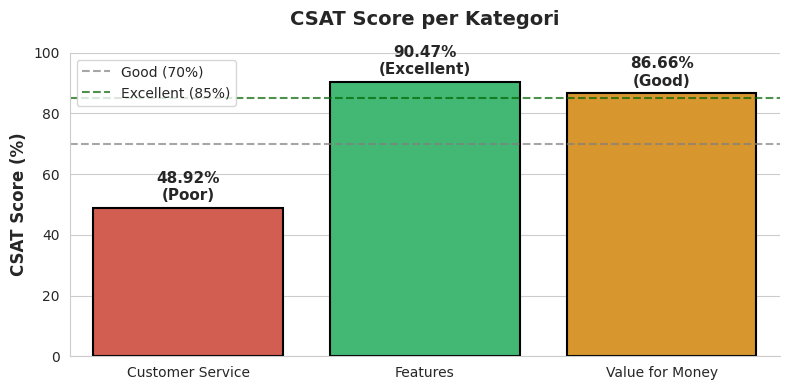

In [ ]:
# Data CSAT Score
data2 = {
    'Kategori': ['Customer Service', 'Features', 'Value for Money'],
    'Score': [48.92, 90.47, 86.66],
    'Status': ['Poor', 'Excellent', 'Good']
}

df2 = pd.DataFrame(data2)

sns.set_style("whitegrid")
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(8, 4))

# Warna berdasarkan performa
colors = ['#e74c3c', '#2ecc71', '#f39c12']  # Merah, Hijau, Orange


bars = sns.barplot(data=df2, x='Kategori', y='Score', palette=colors,
                   edgecolor='black', linewidth=1.5, ax=ax)

# Menambahkan label nilai dan status di atas bar
for i, (score, status) in enumerate(zip(df2['Score'], df2['Status'])):
    ax.text(i, score + 1.5,
            f'{score:.2f}%\n({status})',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Menambahkan garis threshold
ax.axhline(y=70, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Good (70%)')
ax.axhline(y=85, color='darkgreen', linestyle='--', linewidth=1.5, alpha=0.7, label='Excellent (85%)')

ax.set_ylabel('CSAT Score (%)', fontweight='bold', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_title('CSAT Score per Kategori', fontweight='bold', fontsize=14, pad=20)
ax.set_ylim(0, 100)
ax.legend(loc='upper left', fontsize=10, frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Kekuatan utama: Features (produk unggul secara fungsional).

Kelemahan utama: Customer Service (menjadi hambatan utama terhadap kepuasan total pelanggan).

Secara keseluruhan:
Produk sudah kuat di aspek fungsional dan nilai ekonomi, namun pengalaman pelanggan perlu ditingkatkan dari sisi interaksi dan dukungan layanan.

Per Ticket System

In [ ]:
data1 = df.groupby('ticket_system')[csat_cols_flag].mean().reset_index()

In [ ]:
data1

,ticket_system,customer_service_CSATFlag,features_CSATFlag,value_for_money_CSATFlag
0,Freshdesk,0.52,0.92,0.91
1,Jira Service Management,0.52,0.93,0.87
2,ServiceNow,0.37,0.85,0.78
3,Zendesk,0.51,0.88,0.83
4,Zoho Desk,0.46,0.91,0.88
5,otrs,0.44,0.89,0.78


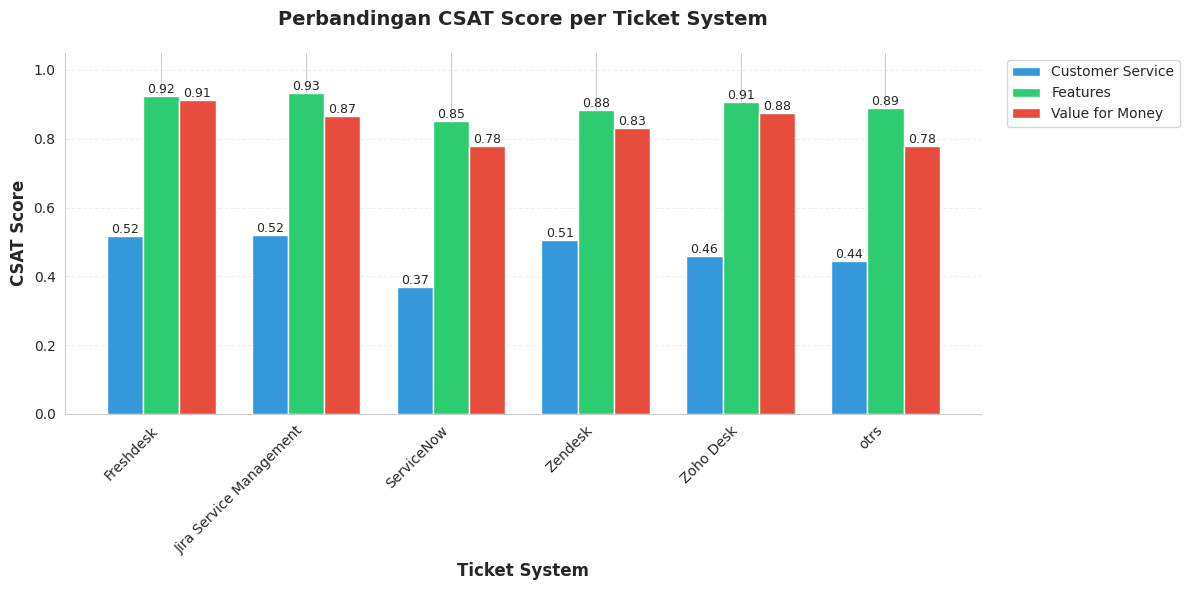

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(data1['ticket_system']))
width = 0.25

bar1 = ax.bar(x - width, data1['customer_service_CSATFlag'], width,
              label='Customer Service', color='#3498db')
bar2 = ax.bar(x, data1['features_CSATFlag'], width,
              label='Features', color='#2ecc71')
bar3 = ax.bar(x + width, data1['value_for_money_CSATFlag'], width,
              label='Value for Money', color='#e74c3c')

# Menambahkan label nilai di atas bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Ticket System', fontweight='bold', fontsize=12)
ax.set_ylabel('CSAT Score', fontweight='bold', fontsize=12)
ax.set_title('Perbandingan CSAT Score per Ticket System', fontweight='bold', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(data1['ticket_system'], rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, frameon=True)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Kekuatan utama: Features — menunjukkan kualitas dan kelengkapan fungsi sudah memuaskan pelanggan.

Kelemahan utama: Customer Service — menjadi titik kritis yang bisa menurunkan pengalaman keseluruhan pelanggan.

Sistem terbaik secara keseluruhan:

- Freshdesk dan Jira Service Management tampil paling seimbang dan unggul di hampir semua aspek.

Sistem yang perlu perhatian:

- ServiceNow memiliki skor CSAT terendah untuk Customer Service dan Value for Money.

###CES dan NPS

####CES

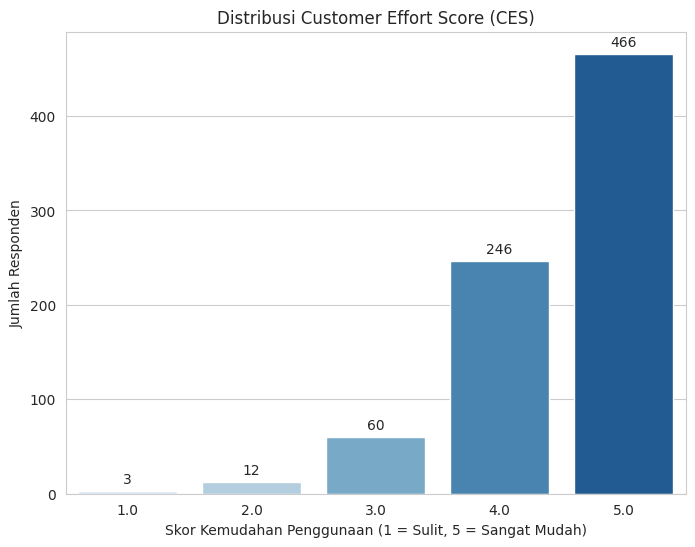

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='ease_of_use', data=df, palette='Blues')

plt.title('Distribusi Customer Effort Score (CES)')
plt.xlabel('Skor Kemudahan Penggunaan (1 = Sulit, 5 = Sangat Mudah)')
plt.ylabel('Jumlah Responden')

# Tambahkan label di atas batang
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 5, int(p.get_height()),
             ha='center', va='bottom')

plt.show()

Rata-rata CES = 4.47 (Sangat Tinggi)
→ Ini berarti pelanggan merasa sangat mudah menggunakan produk atau layanan.

Fokus selanjutnya bisa diarahkan pada:

- Menganalisis pelanggan dengan skor rendah (1–3) → cari tahu kendala mereka.

- Mempertahankan kemudahan bagi pelanggan baru agar pengalaman positif tetap konsisten.

####NPS

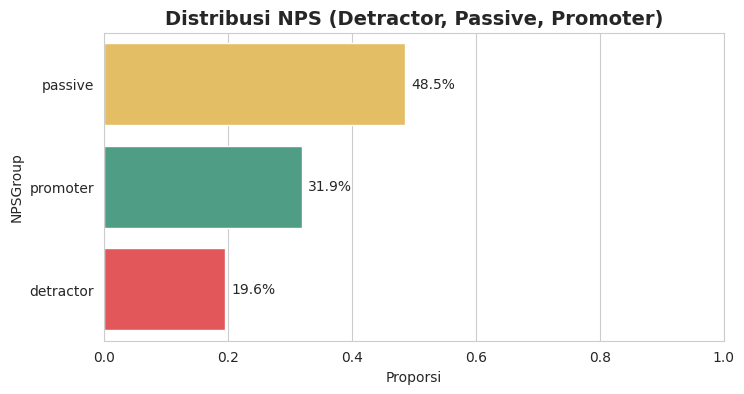

In [ ]:
nps_df = nps / nps.sum()

colors = {
    'detractor': '#F94144',
    'passive': '#F9C74F',
    'promoter': '#43AA8B'
}

plt.figure(figsize=(8, 4))
sns.barplot(
    x=nps_df.values,
    y=nps_df.index,
    palette=[colors[i] for i in nps_df.index]
)

plt.title('Distribusi NPS (Detractor, Passive, Promoter)', fontsize=14, fontweight='bold')
plt.xlabel('Proporsi')

for i, v in enumerate(nps_df.values):
    plt.text(v + 0.01, i, f"{v*100:.1f}%", va='center')

plt.xlim(0, 1)
plt.show()

NPS Score = Promoter (31.9%) – Detractor (19.6%) = 12.3% (Average, tapi masih rendah)
→ pelanggan cukup puas, namun belum cukup kuat untuk menjadi promoter yang aktif merekomendasikan produk.

Fokus utama sebaiknya pada:

- Mengubah Passive menjadi Promoter melalui peningkatan pengalaman pelanggan.

- Menurunkan Detractor dengan memperbaiki titik-titik pain point yang menyebabkan ketidakpuasan.

###Distribusi Sentimen Pelanggan

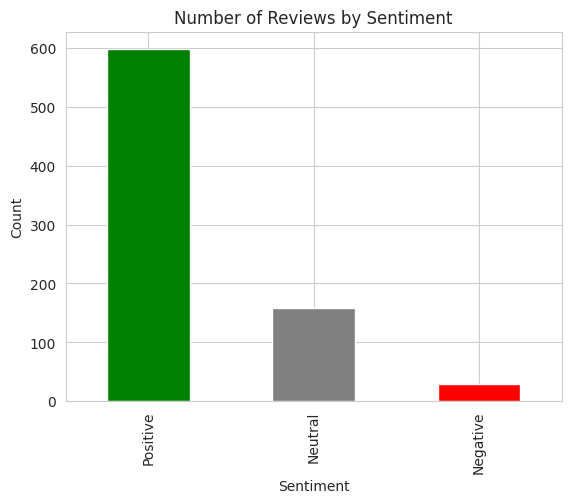

In [ ]:
sentiment_count.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Number of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

- Secara keseluruhan, brand memiliki citra positif yang kuat di mata pelanggan.

- Namun, ulasan netral dan negatif bisa jadi peluang untuk continuous improvement — terutama memahami aspek mana yang belum sepenuhnya memenuhi ekspektasi pelanggan.

###Korelasi antara overall rating dan overall review

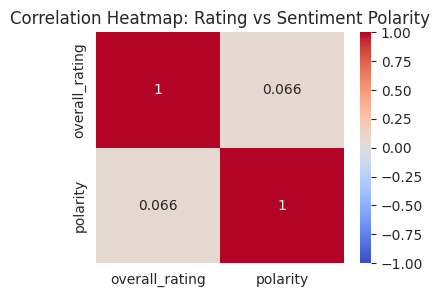

In [ ]:
corr = df[['overall_rating', 'polarity']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Rating vs Sentiment Polarity')
plt.show()

Hubungan antara sentiment polarity dan overall rating lemah — artinya, meskipun sebagian besar ulasan positif, hal itu tidak selalu sejalan dengan rating tinggi yang diberikan pengguna. Padahal jika dilihat dari data, mayoritas ulasan positif, dan itu sejalan dengan overall_rating yang juga dominan 4 dan 5.
Jadi secara arah, dua variabel ini konsisten positif — artinya orang yang menulis ulasan dengan sentimen positif juga cenderung memberi rating tinggi. Tetapi jika diliat nilai korelasinya lemah itu karena adanya keterbatasan atau variasi tipe data yang membuat data jadi imbalanced, dan adanya perbedaan skala data juga. Jadi hasilnya tidak bertentangan, hanya terbatas oleh bentuk datanya.

## Finalize Data for Reporting

Save the review data with NPS category and sentiment information to new csv for the dashboard.

In [ ]:
# Save Data
df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,customer_service_CSATFlag,features_CSATFlag,value_for_money_CSATFlag,NPSGroup,cleaned_review,polarity,sentiment
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,1,0,0,detractor,customer tickets managements,0.00,Neutral
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",1,1,1,passive,"6 months using zoho desk, shifted different so...",0.50,Positive
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,0,1,1,detractor,pros:zendesk go-to solutions helpdesk software...,0.19,Positive
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,1,1,1,passive,useful far integrate multiple brands allowing ...,0.13,Positive
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,1,1,1,passive,pros:it's easy use intuitive.we issues functio...,0.17,Positive


In [ ]:
df.to_csv('CSATandSentiment.csv')